In [2]:
import os
import pandas as pd
import numpy as np
import cv2  # conda install -c conda-forge opencv
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['axes.grid'] = False
#plt.style.use('dark_background')
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 15
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["figure.facecolor"] = "white"



In [5]:
vid_path = "./data/videos/tmp_metachronal_freq/"
vid_filenames = sorted([f for f in os.listdir(vid_path) if f.endswith(".MP4")])
print(vid_filenames)

['2024_0321_163002_068.MP4', '2024_0321_163029_069.MP4', '2024_0321_163043_070.MP4', '2024_0321_163126_071.MP4']


In [3]:
# EXTRACT_FRAMES = False
# for vid_filename in vid_filenames:
#     frames_filepaths = f"./data/images/{vid_filename.split('.')[0]}/"
#     zfill_ = 5

#     if EXTRACT_FRAMES:
#         os.makedirs(frames_filepaths, exist_ok=True)
#         video = cv2.VideoCapture(f"{vid_path}{vid_filename}")
#         frame_counter = 0
#         while True:
#             ret, frame = video.read()
#             if not ret:
#                 break
#             if frame_counter % 1 == 0:
#                 cv2.imwrite(f"{frames_filepaths}/frame_{str(frame_counter).zfill(zfill_)}.jpg", frame)  
#             frame_counter += 1
#         video.release()

In [9]:
vid_filename = vid_filenames[0]

video = cv2.VideoCapture(f"{vid_path}{vid_filename}")
fps = int(video.get(cv2.CAP_PROP_FPS))
print(fps)
video.release()
# fps, width, height = [], [], []
# for nth, row in df.iterrows():
#     vid_filename = row["filename"] + file_ext
#     vid_filepath = f"{vid_path}{vid_filename}"
#     video = cv2.VideoCapture(vid_filepath)
#     fps.append(int(video.get(cv2.CAP_PROP_FPS)))
#     width.append(int(video.get(cv2.CAP_PROP_FRAME_WIDTH)))
#     height.append(int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
#     video.release()


120


In [14]:
# Construct the dataframe
img_path = f"./data/images/{vid_filename.split('.')[0]}"
frames_filepaths = sorted([os.path.join(img_path, f) for f in os.listdir(f"{img_path}/") if f.endswith(".jpg")])
zfill_ = 5

frames = np.linspace(0, len(frames_filepaths), len(frames_filepaths)).astype("int")
df = pd.DataFrame(frames, columns=["frame"])
df["time"] = np.linspace(0, len(df) / fps, len(df))
df["img_fpath"] = frames_filepaths # [f"{frames_filepaths}frame_{str(nth).zfill(zfill_)}.jpg" for nth in range(len(df))]

# For Visualization of all and subsample
desired_cmap = "brg"
cmap = plt.get_cmap(desired_cmap)
colors = [cmap(i)[:3] for i in np.linspace(0, 1, len(df))]

num_frames = len(df)
print("num_frames:", num_frames)
df.head(5)

num_frames: 563


,frame,time,img_fpath
0,0,0.000000,./data/images/2024_0321_163002_068/frame_00000...
1,1,0.008348,./data/images/2024_0321_163002_068/frame_00001...
2,2,0.016696,./data/images/2024_0321_163002_068/frame_00002...
3,3,0.025044,./data/images/2024_0321_163002_068/frame_00003...
4,4,0.033393,./data/images/2024_0321_163002_068/frame_00004...


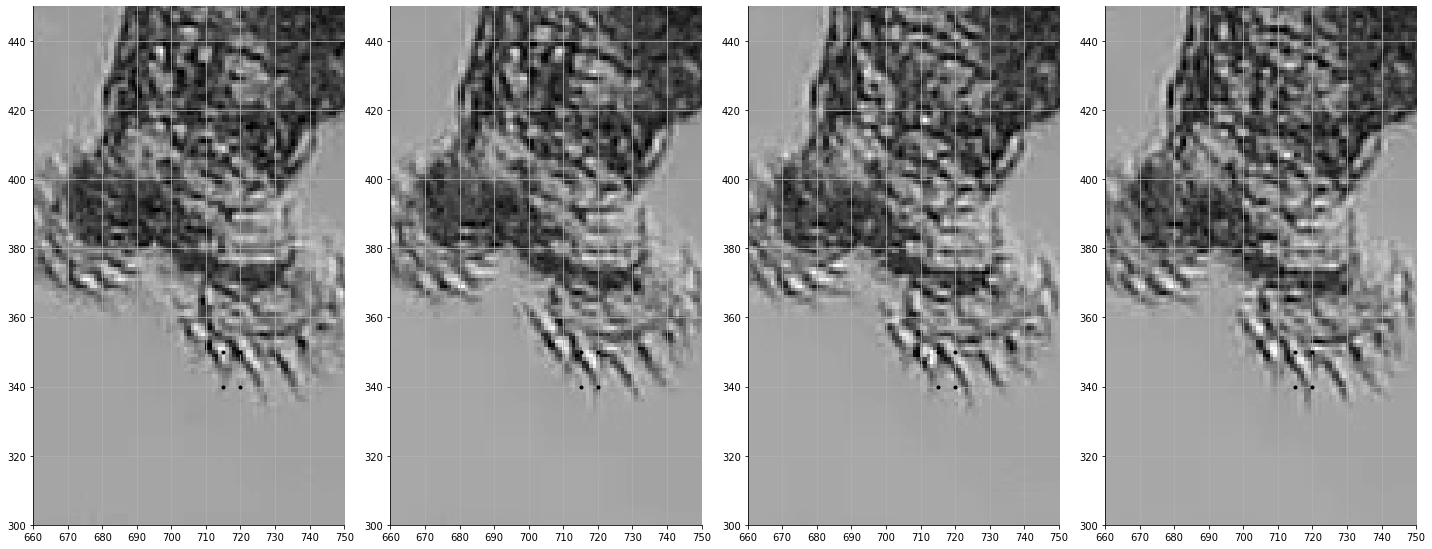

In [17]:
plt.rcParams['figure.facecolor'] = 'white'

bbox = [715, 720,340,350]  # x1,x2,y1,y2
cidx_ = np.arange(30, 70, 10)
zxlim = [660, 750]; zylim = [300, 450]
fig, ax = plt.subplots(1, len(cidx_), figsize=(20,20), layout="tight")

for nth, i in enumerate(cidx_):
    cimg = cv2.cvtColor(cv2.imread(df.loc[i, "img_fpath"], 1), cv2.COLOR_BGR2GRAY)
    ax[nth].imshow(cimg, cmap="gray")
    ax[nth].set_xlim(zxlim); ax[nth].set_ylim(zylim)
    ax[nth].plot([bbox[0], bbox[1], bbox[1], bbox[0]],[bbox[2], bbox[3], bbox[2], bbox[3]], ".k")
    ax[nth].grid(True)
    
# mask out the bbox region! use eg bitwise_or

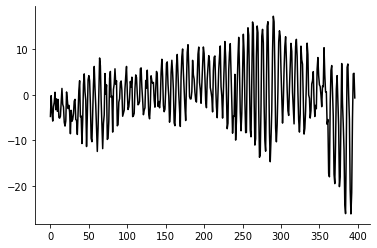

In [18]:
pixel_values = []

bbox = [715, 720,340,350]  # x1,x2,y1,y2
cidx_ = np.arange(3, 400, 1)
for nth, i in enumerate(cidx_):
    cimg = cv2.cvtColor(cv2.imread(df.loc[i, "img_fpath"], 1), cv2.COLOR_BGR2GRAY)
    pixel_values.append(cimg[bbox[2]:bbox[3], bbox[0]:bbox[1]])

avg_pix = []
yavg_pix = []

for px in pixel_values:
    avg_pix.append(np.mean(px))

avg_pix = np.array(avg_pix) - np.mean(avg_pix)

plt.plot(avg_pix, "-k")

120


Text(0, 0.5, 'Power')

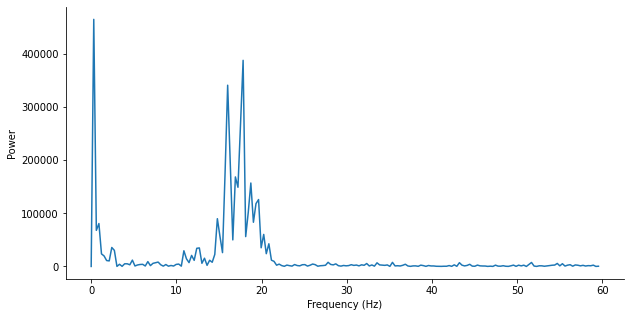

In [19]:
sampling_rate = fps  # Hz
print(sampling_rate)

fft_result = np.fft.fft(avg_pix)
freqs = np.fft.fftfreq(len(avg_pix), d=1/sampling_rate)
power_spectrum = np.abs(fft_result)**2

plt.figure(figsize=(10, 5))
plt.plot(freqs[:len(avg_pix)//2], power_spectrum[:len(avg_pix)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

In [3]:
vid_filename = "2024_0403_115801_028.MP4" #vid_filenames[0]
vid_path = "./data/videos/birdbath/vortex/"

video = cv2.VideoCapture(f"{vid_path}{vid_filename}")
fps = int(video.get(cv2.CAP_PROP_FPS))
print(fps)
video.release()
# fps, width, height = [], [], []
# for nth, row in df.iterrows():
#     vid_filename = row["filename"] + file_ext
#     vid_filepath = f"{vid_path}{vid_filename}"
#     video = cv2.VideoCapture(vid_filepath)
#     fps.append(int(video.get(cv2.CAP_PROP_FPS)))
#     width.append(int(video.get(cv2.CAP_PROP_FRAME_WIDTH)))
#     height.append(int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
#     video.release()


120


In [4]:
# Construct the dataframe
img_path = f"./data/images/{vid_filename.split('.')[0]}"
frames_filepaths = sorted([os.path.join(img_path, f) for f in os.listdir(f"{img_path}/") if f.endswith(".jpg")])
zfill_ = 5

frames = np.linspace(0, len(frames_filepaths), len(frames_filepaths)).astype("int")
df = pd.DataFrame(frames, columns=["frame"])
df["time"] = np.linspace(0, len(df) / fps, len(df))
df["img_fpath"] = frames_filepaths # [f"{frames_filepaths}frame_{str(nth).zfill(zfill_)}.jpg" for nth in range(len(df))]

# For Visualization of all and subsample
desired_cmap = "brg"
cmap = plt.get_cmap(desired_cmap)
colors = [cmap(i)[:3] for i in np.linspace(0, 1, len(df))]

num_frames = len(df)
print("num_frames:", num_frames)
df.head(5)

num_frames: 1588


,frame,time,img_fpath
0,0,0.000000,./data/images/2024_0403_115801_028/frame_00000...
1,1,0.008339,./data/images/2024_0403_115801_028/frame_00001...
2,2,0.016677,./data/images/2024_0403_115801_028/frame_00002...
3,3,0.025016,./data/images/2024_0403_115801_028/frame_00003...
4,4,0.033354,./data/images/2024_0403_115801_028/frame_00004...


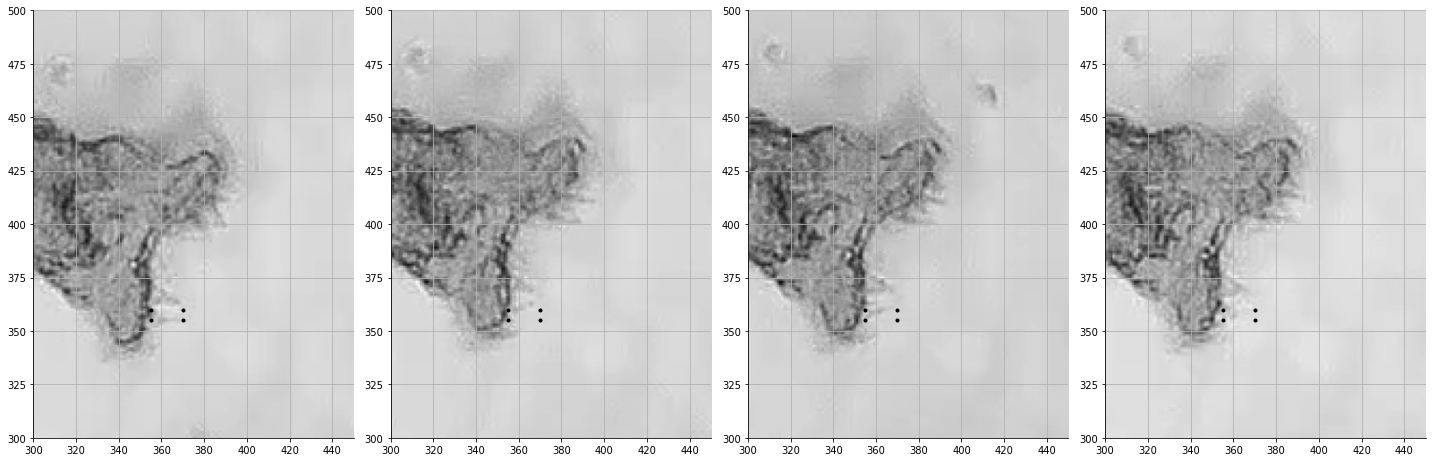

In [13]:
plt.rcParams['figure.facecolor'] = 'white'

bbox = [355, 370, 355,360]  # x1,x2,y1,y2
cidx_ = np.arange(300, 700, 100)
zxlim = [300, 450]; zylim = [300, 500]
fig, ax = plt.subplots(1, len(cidx_), figsize=(20,20), layout="tight")

for nth, i in enumerate(cidx_):
    cimg = cv2.cvtColor(cv2.imread(df.loc[i, "img_fpath"], 1), cv2.COLOR_BGR2GRAY)
    ax[nth].imshow(cimg, cmap="gray")
    ax[nth].set_xlim(zxlim); ax[nth].set_ylim(zylim)
    ax[nth].plot([bbox[0], bbox[1], bbox[1], bbox[0]],[bbox[2], bbox[3], bbox[2], bbox[3]], ".k")
    ax[nth].grid(True)
    
# mask out the bbox region! use eg bitwise_or

In [33]:
pixel_values = []

bbox = [355, 370, 355,360]  # x1,x2,y1,y2
cidx_ = np.arange(781, 1300, 1)
for nth, i in enumerate(cidx_):
    cimg = cv2.cvtColor(cv2.imread(df.loc[i, "img_fpath"], 1), cv2.COLOR_BGR2GRAY)
    pixel_values.append(cimg[bbox[2]:bbox[3], bbox[0]:bbox[1]])

avg_pix = []
yavg_pix = []

for px in pixel_values:
    avg_pix.append(np.mean(px))

avg_pix = np.array(avg_pix) - np.mean(avg_pix)

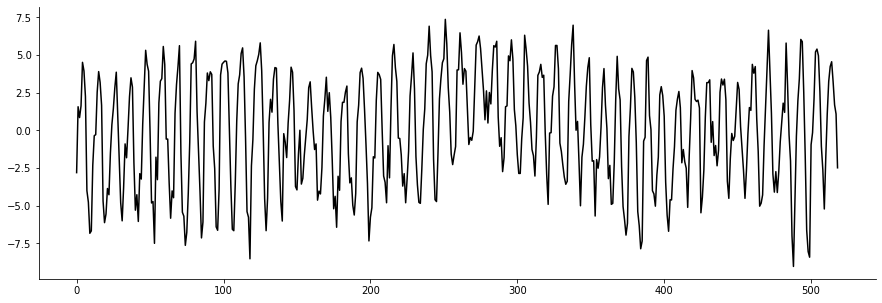

In [34]:
plt.figure(figsize=(15,5))
plt.plot(avg_pix, "-k")

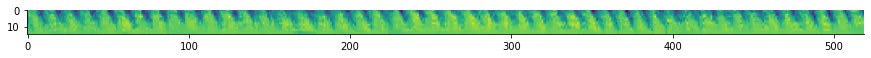

In [35]:
kyo = np.transpose(np.mean(np.stack(pixel_values), axis=1))
plt.figure(figsize=(15,15))
plt.imshow(kyo)

120


Text(0, 0.5, 'Power')

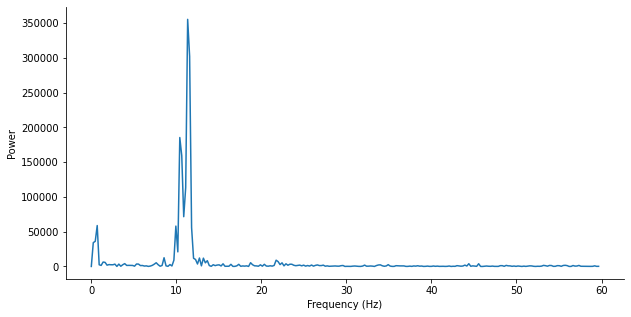

In [36]:
sampling_rate = fps  # Hz
print(sampling_rate)

fft_result = np.fft.fft(avg_pix)
freqs = np.fft.fftfreq(len(avg_pix), d=1/sampling_rate)
power_spectrum = np.abs(fft_result)**2

plt.figure(figsize=(10, 5))
plt.plot(freqs[:len(avg_pix)//2], power_spectrum[:len(avg_pix)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

# 2024_0312_200610_055_trimmed_10sec_ts76-te86_cropped_200-850-0-600.mp4

In [11]:
df = pd.read_csv("./data/videos/moss/moss-corona-dataset.csv")
print("n_clips = ", len(df), "\ntotal_duration (sec) = ", df["duration"].sum())
cidx = 8
print(df.loc[cidx, "save_filename"])
df

# Video folder
vid_dir = "videos/moss"
vid_path = f"./data/{vid_dir}/"

# Video
vid_filename = df.loc[cidx, "save_filename"]
vid_extension = "." + vid_filename.split(".")[-1]
vid_filename = vid_filename.split(".")[0]
vid_filepath = f"{vid_path}{vid_filename}{vid_extension}"

# Masks
seg_mask_folder_name = "seg_mask_folder"
seg_mask_path = f"{vid_path}/{seg_mask_folder_name}/{vid_filename}_masks"

# Image Frames
frames_filepaths = f"./data/images/{vid_filename}/"
zfill_ = 5

# Results
save_figure_path = f"{vid_path}/results/{vid_filename}"
os.makedirs(save_figure_path, exist_ok=True)

# Params
fps = df.loc[cidx, "fps"]
width = df.loc[cidx, "width"]
height = df.loc[cidx, "height"]
resolution = (height,width)

print(fps, resolution)

# DF STUFF
# Get Segmentation masks > results of tracking 
mask_filenames = sorted([f for f in os.listdir(seg_mask_path) if f.endswith("png")])
mask_filepaths = [os.path.join(seg_mask_path, fn) for fn in mask_filenames]

# Construct the dataframe
frames = np.linspace(0, len(mask_filepaths), len(mask_filepaths)).astype("int")
df = pd.DataFrame(frames, columns=["frame"])
df["time"] = np.linspace(0, len(df) / fps, len(df))
df["mask_fpath"] = mask_filepaths

num_frames = len(df)
print("num_frames:", num_frames, "; save_figure_path:", save_figure_path, "; fps:", fps, "; resolution:", resolution)

# Adjust resolution depending on frame rate
if fps == 24:
    pixel_per_real_width = .4 # 2.5
    print("UHD, pixel_per_real_width = ", pixel_per_real_width)
elif fps == 60 or fps == 30:
    pixel_per_real_width = .61 # 1.65
    print("FHD, pixel_per_real_width = ", pixel_per_real_width)

# Load in the segmentation masks and find contrours
segmentation_mask_filepaths = df["mask_fpath"].tolist()

#frame_idx = 163 # 128
#contour_list = get_contours_from_segmasks(segmentation_mask_filepaths[:frame_idx])
contour_list = get_contours_from_segmasks(segmentation_mask_filepaths)

# Get contour stats
df_ = get_contour_stats(contour_list) # add xtime but beware of NaN???!!! if area <5

# Concat dfs
df = pd.concat([df, df_], axis=1)
df["img_fpath"] = [f"{frames_filepaths}frame_{str(nth).zfill(zfill_)}.jpg" for nth in range(len(df))]

# Mark frames for subsampling
every_nth_frame = int(fps/2) # subsampling of frames to illustrate
frame_subsample = np.arange(0, num_frames, every_nth_frame)
df["frame_shown"] = 0
df.loc[frame_subsample, "frame_shown"] = 1

# For Visualization of all and subsample
desired_cmap = "brg"
cmap = plt.get_cmap(desired_cmap)
colors = [cmap(i)[:3] for i in np.linspace(0, 1, len(df))]
sub_colors = [cmap(i)[:3] for i in np.linspace(0, 1, len(frame_subsample))]
sub_index = np.arange(0, len(frame_subsample), 1)

# Check df
#df = df[:frame_idx]
num_frames = len(df)
print("num_frames:", num_frames)
#df.head(5)

n_clips =  19 
total_duration (sec) =  170
2024_0312_200610_055_trimmed_10sec_ts76-te86_cropped_200-850-0-600.mp4
60 (1080, 1920)
num_frames: 600 ; save_figure_path: ./data/videos/moss//results/2024_0312_200610_055_trimmed_10sec_ts76-te86_cropped_200-850-0-600 ; fps: 60 ; resolution: (1080, 1920)
FHD, pixel_per_real_width =  0.61
num_frames: 600


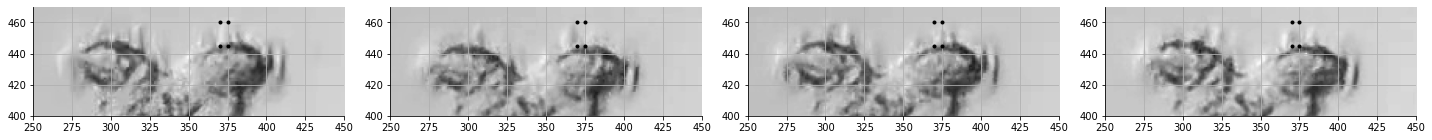

In [15]:
plt.rcParams['figure.facecolor'] = 'white'

bbox = [370, 375, 445, 460]  # x1,x2,y1,y2
cidx_ = np.arange(0, 120, 30)
zxlim = [250, 450]; zylim = [400, 470]

fig, ax = plt.subplots(1, len(cidx_), figsize=(20,20), layout="tight")

for nth, i in enumerate(cidx_):
    cimg = cv2.cvtColor(cv2.imread(df.loc[i, "img_fpath"], 1), cv2.COLOR_BGR2GRAY)
    ax[nth].imshow(cimg, cmap="gray")
    ax[nth].set_xlim(zxlim); ax[nth].set_ylim(zylim)
    ax[nth].plot([bbox[0], bbox[1], bbox[1], bbox[0]],[bbox[2], bbox[3], bbox[2], bbox[3]], ".k")
    ax[nth].grid(True)
    
# mask out the bbox region! use eg bitwise_or

60


Text(0, 0.5, 'Power')

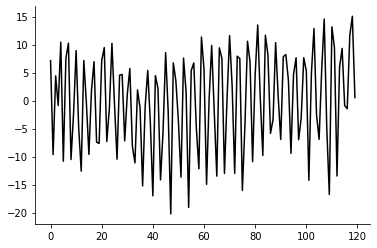

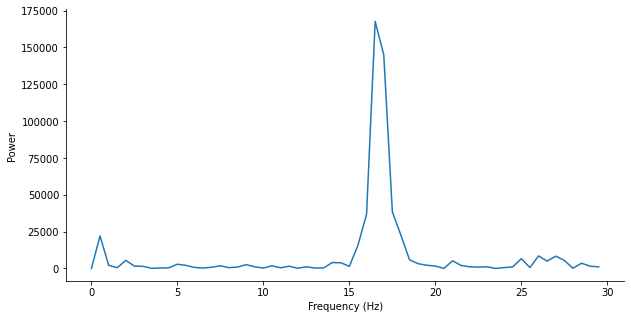

In [18]:
pixel_values = []

bbox = [370, 375, 445, 460] 
cidx_ = np.arange(0, 120, 1)
for nth, i in enumerate(cidx_):
    cimg = cv2.cvtColor(cv2.imread(df.loc[i, "img_fpath"], 1), cv2.COLOR_BGR2GRAY)
    pixel_values.append(cimg[bbox[2]:bbox[3], bbox[0]:bbox[1]])

avg_pix = []
yavg_pix = []

for px in pixel_values:
    avg_pix.append(np.mean(px))

avg_pix = np.array(avg_pix) - np.mean(avg_pix)

plt.plot(avg_pix, "-k")

sampling_rate = fps  # Hz
print(sampling_rate)

fft_result = np.fft.fft(avg_pix)
freqs = np.fft.fftfreq(len(avg_pix), d=1/sampling_rate)
power_spectrum = np.abs(fft_result)**2

plt.figure(figsize=(10, 5))
#plt.plot(freqs[:len(avg_pix)], power_spectrum[:len(avg_pix)])
plt.plot(freqs[:len(avg_pix)//2], power_spectrum[:len(avg_pix)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')